## Importing libraries

In [2]:
import pandas as pd
import string
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


## Importing data and concating on mcn json files

In [ ]:
# MCN is a repository that creates a recommendation model here: https://github.com/WangXin93/fashion_compatibility_mcn
# The author creates a different version of the polyvore dataset with small changes. The json files with the can provide
# inforamtion or we just can use the json files of the original file

In [41]:
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/train_no_dup_with_category_3more_name.json') as f:
    data = json.load(f)

train_3more_name_df = pd.DataFrame(data)
train_3more_name_df = train_3more_name_df.T

In [42]:
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/test_no_dup_with_category_3more_name.json') as f:
    data = json.load(f)

test_3more_name_df = pd.DataFrame(data)
test_3more_name_df = test_3more_name_df.T

In [43]:
with open('/home/thanos/Desktop/Sustainable_fashion/repos/fashion_compatibility_mcn/data/valid_no_dup_with_category_3more_name.json') as f:
    data = json.load(f)
valid_3more_name_df = pd.DataFrame(data)
valid_3more_name_df = valid_3more_name_df.T


In [9]:
train_3more_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, 119704139 to 148787971
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   upper      2000 non-null   object
 1   bottom     2153 non-null   object
 2   shoe       2314 non-null   object
 3   bag        1994 non-null   object
 4   accessory  1712 non-null   object
dtypes: object(5)
memory usage: 115.5+ KB


In [10]:
train_3more_name_df.describe()

,upper,bottom,shoe,bag,accessory
count,13764,14849,15268,12640,12093
unique,10201,11485,11943,10593,10618
top,"{'index': 1, 'name': ''}","{'index': 1, 'name': 'dress'}","{'index': 3, 'name': ''}","{'index': 4, 'name': 'backpack'}","{'index': 5, 'name': ''}"
freq,64,44,47,20,29


In [5]:
test_3more_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16176 entries, 214181831 to 211686294
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   upper      13764 non-null  object
 1   bottom     14849 non-null  object
 2   shoe       15268 non-null  object
 3   bag        12640 non-null  object
 4   accessory  12093 non-null  object
dtypes: object(5)
memory usage: 758.2+ KB


In [7]:
test_3more_name_df.describe()

,upper,bottom,shoe,bag,accessory
count,2000,2153,2314,1994,1712
unique,1919,2068,2232,1944,1676
top,"{'index': 1, 'name': 'top'}","{'index': 1, 'name': 'dress'}","{'index': 3, 'name': ''}","{'index': 5, 'name': ''}","{'index': 6, 'name': ''}"
freq,10,12,12,6,7


In [21]:
valid_3more_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 214272106 to 216814895
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   upper      962 non-null    object
 1   bottom     1052 non-null   object
 2   shoe       1124 non-null   object
 3   bag        948 non-null    object
 4   accessory  823 non-null    object
dtypes: object(5)
memory usage: 56.1+ KB


In [23]:
valid_3more_name_df.describe()

,upper,bottom,shoe,bag,accessory
count,962,1052,1124,948,823
unique,936,1029,1097,933,809
top,"{'index': 1, 'name': ''}","{'index': 1, 'name': 'dress'}","{'index': 2, 'name': ''}","{'index': 4, 'name': 'aldo'}","{'index': 4, 'name': ''}"
freq,5,8,5,3,4


In [39]:
#concating all the data into one data frame to filter outfits
all_df_3more_name = pd.concat([train_3more_name_df,test_3more_name_df,valid_3more_name_df])

In [40]:
all_df_3more_name

,upper,bottom,shoe,bag,accessory
214181831,"{'index': 1, 'name': 'mock neck embroidery sue...","{'index': 3, 'name': 'citizens humanity high r...","{'index': 4, 'name': 'suede tie short boots'}","{'index': 5, 'name': 'cloth travel school back...",NaN
120161271,"{'index': 1, 'name': 'nirvana distressed t-shi...","{'index': 2, 'name': 'rag bone rock w/ black s...","{'index': 3, 'name': 'vans authentic black mon...",NaN,"{'index': 4, 'name': 'time low rubber bracelet..."
143656996,"{'index': 1, 'name': 'monki singlet'}","{'index': 3, 'name': 'topshop moto joni high r...","{'index': 4, 'name': 'black pointed chelsea bo...","{'index': 5, 'name': 'pre-owned chanel shoulde...",NaN
186627934,"{'index': 1, 'name': 'tops'}","{'index': 2, 'name': 'saint laurent zip cutout...",NaN,NaN,"{'index': 4, 'name': 'allurez square diamond h..."
206969379,"{'index': 1, 'name': 'yoins leather sexy v-nec...","{'index': 3, 'name': 'alice+olivia floral patt...","{'index': 4, 'name': 'zipped top chunky booties'}",NaN,"{'index': 5, 'name': 'gold boho turquoise leaf..."
...,...,...,...,...,...
188092561,"{'index': 1, 'name': 'joseph cashmere sweater'}","{'index': 4, 'name': 'rag washed leather skinn...",NaN,"{'index': 5, 'name': 'fendi peekaboo leather t...","{'index': 6, 'name': 'weekend max mara necklace'}"
207031876,NaN,"{'index': 1, 'name': 'alexander wang short dre...","{'index': 2, 'name': 'aquazzura wild thing sue...","{'index': 3, 'name': 'miu miu small leather ca...","{'index': 4, 'name': 'prada leather belt'}"
187953065,"{'index': 1, 'name': 'cut shell top'}","{'index': 3, 'name': 'topshop wool blend a-lin...","{'index': 4, 'name': 'ralph lauren collection ...","{'index': 5, 'name': 'alexander mcqueen hunter...","{'index': 6, 'name': 'forever faux pearl rhine..."
133190483,"{'index': 2, 'name': 'bra'}","{'index': 1, 'name': 'shorts'}","{'index': 3, 'name': 'nike black core flex tra...",NaN,NaN


<Axes: >

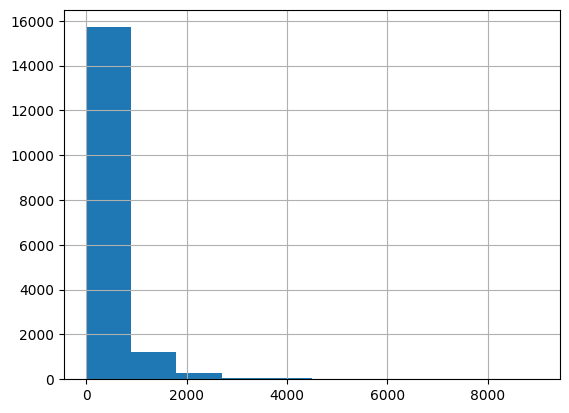

In [5]:
df['likes'].hist()


## Importing data and concating on xthan json files

In [ ]:
##Preprocessing 1:
# We exrtact the categories of the items in the 'items' category. We ll use them later
# We can get the ratio of likes per views to get a better metric wheter the set is actually good or not
# We can then log it. First we the the ratio column and then we log it. Logging is the final step otherwise there is no differenece.
# Moreover we can cut the bottom %5 or some other ratio in order to get the outfits tha have been viewed a decemnt amount of times
#train_df['categories_list'] = train_df['items'].apply(lambda items_list: [item['categoryid'] for item in items_list])

#train_df['likes_to_views_ratio'] = train_df['likes']/train_df['views']

#train_df.drop(columns=(['items','image','set_url']),axis=1,inplace=True)

In [ ]:
##! OPTIONANL for testing
# #if we want to drop a percent of our dataset to crop the outliers
# lower_threshold = df['views'].quantile(0.05)
# upper_threshold = df['views'].quantile(0.95)
#np.log(train_df.likes/train_df.views).hist()
# df_filtered = train_df[(train_df['views'] >= lower_threshold) & (train_df['views'] <= upper_threshold)]


In [65]:
# importing the data from the tree different files
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/train_no_dup.json') as f:
    data1 = json.load(f)

train_df = pd.DataFrame(data1)
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/test_no_dup.json') as f:
    data2 = json.load(f)

test_df = pd.DataFrame(data2)
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/valid_no_dup.json') as f:
    data3 = json.load(f)

valid_df = pd.DataFrame(data3)

In [66]:
# We use this function to summarize all of our first steps of preprocessing
def preprocessing_1 (df):
    #creating a list with the number of the items
    df['categories_list'] = df['items'].apply(lambda items_list: [item['categoryid'] for item in items_list])
    #creating the target vector. Or we can simply leave the 'likes' vector as the target vector
    df['likes_to_views_ratio'] = df['likes']/df['views']
    #drop the extra columns we dont want anymore 
    df.drop(columns=(['items','image','set_url','date']),axis=1,inplace=True)
    #lower the description to extract later some text
    df.desc.str.lower()
    # lower the name
    df.name.str.lower()
    # deleting the punctuation from both the columns
    df.desc = df.desc.str.lower().str.replace('[{}]'.format(string.punctuation), ' ', regex=True)
    df.name = df.name.str.lower().str.replace('[{}]'.format(string.punctuation), ' ', regex=True)
    return df

In [67]:
train_df = preprocessing_1(train_df)
test_df = preprocessing_1(test_df)
valid_df = preprocessing_1(valid_df)

In [68]:
all_df = pd.concat([train_df,test_df,valid_df],ignore_index=True)
all_df

,name,views,likes,set_id,desc,categories_list,likes_to_views_ratio
0,casual,8743,394,214181831,a fashion look from january 2017 by beebeely l...,"[4495, 25, 27, 261, 259, 1967, 2]",0.045065
1,being a vans shoe model with luke idk about t...,188,9,120161271,a fashion look from april 2014 featuring destr...,"[21, 237, 49, 106, 106, 106, 106, 106]",0.047872
2,these chanel bags is a bad habit x,562,32,143656996,12 19 14,"[104, 25, 237, 261, 37, 55]",0.056940
3,avenger supernatural prp,2613,88,186627934,a fashion look from january 2016 by alyssaclai...,"[11, 28, 2, 65, 52, 200, 186, 76]",0.033678
4,boho 39,62,3,206969379,a fashion look from august 2016 by kate goida ...,"[11, 236, 9, 261, 64, 62, 1967, 200]",0.048387
...,...,...,...,...,...,...,...
21884,celebrity closet white shirt dress,768,222,207031876,a fashion look from august 2016 by arethaman f...,"[4, 46, 318, 52]",0.289062
21885,army,281,30,187953065,a fashion look from january 2016 by catherine ...,"[11, 24, 9, 46, 37, 62, 1967]",0.106762
21886,séance de sport avec niall tenuesport,79,2,133190483,a fashion look from august 2014 featuring spor...,"[255, 257, 49, 76]",0.025316
21887,gravity falls wendy corduroy,519,207,216814895,a fashion look from february 2017 by hollowpoi...,"[17, 104, 237, 42, 64, 55]",0.398844


In [69]:
# Every number corresponds to a subcategory listed in a txt file in the dataset
# Then we map these subcategories to our categories
category_mapping = {
"Tops": [11, 15, 17,18,19,21,343,104,252,272,273,275,286,309,342,4454,4495,4496, 4497, 4498, 341 ],

"Bottoms": [7, 8, 9, 10, 27, 28, 29, 237, 238, 239, 240, 241, 251, 253, 254, 255, 278, 279, 280, 287, 288, 4452, 4458, 4459, 332],

"Accessories": [40, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 64, 65, 67, 105, 106, 107, 270, 299, 300, 301, 302, 303, 304, 305, 4447, 4463, 4466, 4467, 4470, 4472, 4523, 4524, 4525, 1967],

"Shoes": [41, 42, 43, 46, 47, 48, 49, 50, 261, 262, 263, 264, 265, 266, 267, 268, 291, 292, 293, 294, 295, 296, 297, 298, 4464, 4465, 4522],

"Outwear": [23, 24, 25, 26, 256, 276, 277, 289, 4455, 4457, 4456,236 ],

"Bags": [35, 36, 37, 38, 231, 258, 259, 290, 4461, 4462, 4474, 4520, 4521],

"Onepieces": [3, 4, 5, 6, 30, 75, 243, 244, 281, 4486, 4516, 1606, 1607]}

In [ ]:
# Function to replace the numbers in the lists of "categories_list" column with the 
# corresponding Class name string according to the category_mapping dictionary
def replace_codes_with_names(codes):
    new_list = []
    for code in codes:
        for category, mappings in category_mapping.items():
            if code in mappings:
                new_list.append(category)
                break
        else:
            new_list.append("Other")  # If the code is not found in any mapping, tag it as "Other"
    return new_list

In [ ]:
all_df['category_names'] = all_df['categories_list'].apply(replace_codes_with_names)


In [99]:
form1 = {'Tops', 'Bottoms', 'Shoes', 'Bags', 'Accessories', 'Outwear'}
form2 = {'Onepieces', 'Shoes', 'Bags', 'Accessories', 'Outwear'}
form1_no_outerwear = form1 - {'Outwear'}
form2_no_outerwear = form2 - {'Outwear'}
# Function to filter rows based on forms WITH Outerwears
def filter_rows_WITH_outerwear(categories):
    # Exclude "Other" from the categories
    category_set = set(categories) - {'Other'}
    return category_set == form1 or category_set == form2
# Function to filter rows based on forms WITH NO Outerwears
def filter_rows_NO_outerwear(categories):
    # Exclude "Other" from the categories
    form1 
    category_set = set(categories) - {'Other','Outerwear'}
    return category_set == form1_no_outerwear or category_set == form2_no_outerwear

In [101]:
# Function to filter rows based on forms WITH NO Outerwears
def filter_rows_NO_outerwear(categories):
    # Exclude "Other" from the categories
    form1 
    category_set = set(categories) - {'Other','Outerwear'}
    return category_set == form1_no_outerwear or category_set == form2_no_outerwear

In [102]:
all_df_NO_Outerwear = all_df.copy()
all_df_WITH_Outerwear = all_df.copy()

In [103]:
all_df_WITH_Outerwear = all_df_WITH_Outerwear[all_df_WITH_Outerwear['category_names'].apply(filter_rows_WITH_outerwear)]
all_df_NO_Outerwear = all_df_NO_Outerwear[all_df_NO_Outerwear['category_names'].apply(filter_rows_NO_outerwear)]


In [60]:
# Function to filter rows based on forms WITH Outerwears
def filter_rows(categories):
    # Exclude "Other" from the categories
    category_set = set(categories) - {'Other'}
    return category_set == form1 or category_set == form2

In [63]:
all_df = all_df[all_df['category_names'].apply(filter_rows)]


In [64]:
all_df

,name,views,likes,date,set_id,desc,category_names,categories_list,likes_to_views_ratio
0,casual,8743,394,One month,214181831,a fashion look from january 2017 by beebeely l...,"[Tops, Outwear, Bottoms, Shoes, Bags, Accessor...","[4495, 25, 27, 261, 259, 1967, 2]",0.045065
2,these chanel bags is a bad habit x,562,32,Two years,143656996,12 19 14,"[Tops, Outwear, Bottoms, Shoes, Bags, Accessor...","[104, 25, 237, 261, 37, 55]",0.056940
9,yoins casual faux fur vest,24915,492,One month,213824660,a fashion look from december 2016 by beebeely ...,"[Tops, Outwear, Bottoms, Shoes, Accessories, O...","[11, 24, 237, 261, 58, 188, 171, 37]",0.019747
16,edgy style,1218,328,29 days,215293689,a fashion look from january 2017 by pokadoll f...,"[Onepieces, Outwear, Other, Shoes, Bags, Acces...","[5, 25, 2, 261, 38, 62, 200]",0.269294
18,без названия 322,1341,212,One year,152669888,a fashion look from march 2015 featuring rolle...,"[Tops, Outwear, Bottoms, Shoes, Bags, Other, O...","[21, 25, 240, 49, 37, 4438, 2, 67]",0.158091
...,...,...,...,...,...,...,...,...,...
21830,flounce ruffles checked straight dress,1348,538,One month,214555487,a fashion look from january 2017 by katjuncica...,"[Onepieces, Outwear, Shoes, Shoes, Accessories...","[4, 25, 261, 261, 65, 259]",0.399110
21860,yoins 20 08 2016 083,461,134,6 months,206332537,a fashion look from august 2016 by aysebt feat...,"[Onepieces, Outwear, Shoes, Shoes, Bags, Acces...","[5, 25, 43, 43, 37, 62, 196, 196]",0.290672
21871,casual,4877,384,One month,213826418,a fashion look from december 2016 by beebeely ...,"[Tops, Outwear, Bottoms, Shoes, Bags, Accessor...","[19, 25, 237, 49, 259, 40, 60, 3336]",0.078737
21877,outfit of the day,1019,214,Three days,216860218,a fashion look from february 2017 by dressedby...,"[Tops, Outwear, Bottoms, Shoes, Bags, Accessor...","[17, 236, 28, 46, 37, 64, 65, 65]",0.210010


In [ ]:
# ways to find common elements between two dataframes according to the set_id
a = all_df_NO_Outerwear.set_id
b = all_df_WITH_Outerwear.set_id

# First way with sets
set1 = set(a)
set2 = set(b)
common_elements = list(set1 & set2)
# Second way with intesect function
def common_member(a, b):
    return list(np.intersect1d(a, b))
# Third way with list comprehension
common_elements = list(filter(lambda elem: elem in a, b))


In [10]:
# Our goal is to filter the outfits. Firstly we will try to extract the outfits tha may belonging to mens fashion
# In order to do it we locate the categories that refer to mens fashion according to the txt file.
# Then we try extracting inforamtion on the string columns (describe and name) 
# Initially we check for the outfits that may belong to men fashion
men_subcategories = [343,272,273,275,276,277,278,279,280,281,282,283,284,286,287,288,289,290,291,
                     292,293,294,295,296,297,298,299,300,301,302,303,304,305,342,4447,4454,4455,
                     4456,4457,4458,4459,4460,4461,4462,4463,4464,4465,4466,4467,4472,4474,4497,
                     4498,4520,4521,4522,4523,4524,4525,341]

In [15]:
men_df = all_df[all_df.desc.str.contains(r'\b(men|man)\b', case=False)]

<ipython-input-15-4f35701ff81f>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  men_df = all_df[all_df.desc.str.contains(r'\b(men|man)\b', case=False)]


[]

In [9]:
all_df.set_id

0        214181831
1        120161271
2        143656996
3        186627934
4        206969379
           ...    
21884    207031876
21885    187953065
21886    133190483
21887    216814895
21888    216690089
Name: set_id, Length: 21889, dtype: object

In [18]:
# Checking if there is 
men_fashion = []
count = 0
for i in range(0,len(all_df)):
    b = all_df['categories_list'][i]
    common_elements = common_member(men_subcategories, b)

    if not common_elements:
        continue
    else:    
        print("Index is: ",i, common_elements)
        count = count +1
        men_fashion.append(all_df['set_id'][i])
              

Index is:  42 [303]
Index is:  43 [275, 283, 297, 300]
Index is:  89 [295, 303, 305, 342, 4458, 4463, 4472, 4520]
Index is:  95 [297]
Index is:  105 [275, 278, 297, 4456]
Index is:  160 [275]
Index is:  161 [278, 291, 304, 305, 4454, 4463, 4472]
Index is:  165 [297, 4497]
Index is:  207 [299]
Index is:  230 [303]
Index is:  244 [297]
Index is:  319 [278, 292, 302, 304, 4454, 4456]
Index is:  332 [291]
Index is:  352 [278, 292]
Index is:  373 [278]
Index is:  381 [297, 303]
Index is:  383 [296, 302, 305, 4454, 4455, 4459, 4462]
Index is:  388 [4456]
Index is:  413 [275, 278, 297, 304, 305, 4461, 4498]
Index is:  426 [275, 278, 296, 304, 305, 4454, 4463, 4472]
Index is:  438 [281, 4454]
Index is:  462 [4447]
Index is:  468 [297, 4456]
Index is:  482 [278]
Index is:  499 [275, 290, 292, 299, 4456, 4458]
Index is:  502 [4472]
Index is:  509 [4456]
Index is:  530 [297, 304]
Index is:  532 [4456]
Index is:  607 [305]
Index is:  626 [295, 303, 305, 4454, 4458, 4463]
Index is:  634 [303]
Index

In [19]:
men_fashion

['191351163',
 '132081114',
 '214229253',
 '106355827',
 '213960031',
 '216364199',
 '213826361',
 '215305762',
 '202019542',
 '134693679',
 '194498150',
 '215343472',
 '211833528',
 '115632028',
 '174417852',
 '214484094',
 '210006729',
 '188932164',
 '205659285',
 '202955567',
 '213326437',
 '214068959',
 '198027587',
 '195419772',
 '215195642',
 '120464605',
 '102898975',
 '212985720',
 '210609175',
 '216794880',
 '204291822',
 '214642851',
 '191628098',
 '194154111',
 '118663013',
 '115612642',
 '183955895',
 '212659251',
 '214942478',
 '211682691',
 '201126615',
 '200199511',
 '216031039',
 '212151688',
 '214683778',
 '177551660',
 '190919763',
 '212278415',
 '211451175',
 '212902942',
 '214650035',
 '201474925',
 '216939412',
 '197808771',
 '163142094',
 '206682042',
 '192934133',
 '215652264',
 '210010260',
 '216268594',
 '215105099',
 '111169398',
 '190561086',
 '214717489',
 '210376423',
 '194107275',
 '215718248',
 '204380138',
 '209250091',
 '197547736',
 '196887853',
 '2166

In [20]:
def has_common_elements(row):
    row_set = set(row['categories_list'])
    return bool(row_set.intersection(men_subcategories))

In [217]:
def has_common_elements(row):
    row_set = set(row['categories_list'])
    return bool(row_set.intersection(men_subcategories))

In [21]:
filtered_df2 = all_df[all_df.apply(has_common_elements, axis=1)]


In [22]:
filtered_df2

,name,views,likes,date,set_id,desc,categories_list,likes_to_views_ratio
42,281 gt solivagant,851,118,One year,191351163,a fashion look from february 2016 by dimibra f...,"[11, 25, 237, 46, 37, 64, 303]",0.138660
43,dylan o brien ii,893,31,Two years,132081114,dylan o brien dylanobrien teenwolf,"[40, 275, 283, 297, 300, 95, 316, 1967]",0.034714
89,a preppy life,8,7,One month,214229253,a menswear look from january 2017 by luvadalov...,"[342, 4458, 295, 305, 4520, 4463, 303, 4472]",0.875000
95,sin título 63,169,20,Three years,106355827,a fashion look from december 2013 featuring ta...,"[104, 237, 318, 61, 106, 55, 297, 199]",0.118343
105,ignore unless tagged,295,38,One month,213960031,a menswear look from december 2016 by lightyea...,"[275, 278, 4456, 297, 56]",0.128814
...,...,...,...,...,...,...,...,...
21760,top of the season to you,147,28,Three months,211792665,top of the season to you,"[303, 3336, 4244, 4244, 4244, 4244, 4244, 4244]",0.190476
21801,lovenewchic 78,1028,345,5 months,207631282,a fashion look from september 2016 by carola c...,"[17, 9, 42, 39, 105, 4463]",0.335603
21825,street style,871,326,One month,214716641,a menswear look from january 2017 by jecakns f...,"[304, 4520, 25, 27, 42]",0.374282
21831,rock the vote in style,1971,376,Three months,210750731,a menswear look from november 2016 by yours st...,"[281, 281, 307, 307, 71, 60]",0.190766


In [16]:
count

1012